<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_4_gradient_boosting_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting

## Données

In [1]:
import numpy as np
np.random.seed(2)

X = np.random.rand(300, 1) - 0.5
y = 3*X[:, 0]**2 + 0.1 * np.random.randn(300)

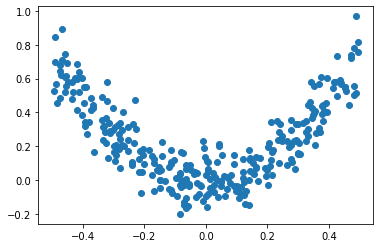

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X.ravel(),y.ravel())

## Principe

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [4]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [5]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [6]:
X_new = np.array([[0.8]])

In [7]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [8]:
y_pred

array([0.69646235])

In [9]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

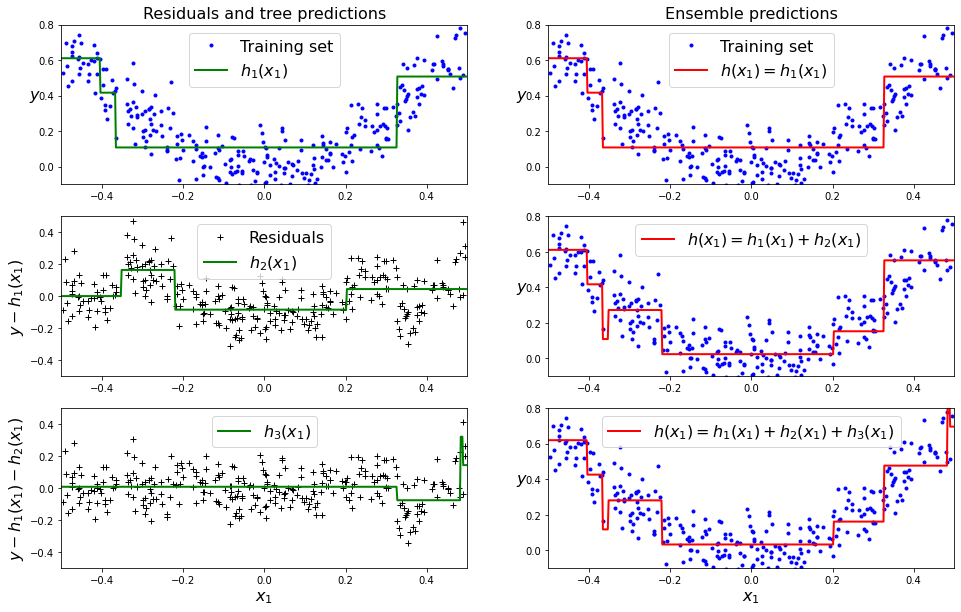

In [10]:
plt.figure(figsize=(16,10))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

## Influence de `learning_rate`

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
gbrt_slow2 = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.01, random_state=42)
gbrt_slow2.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

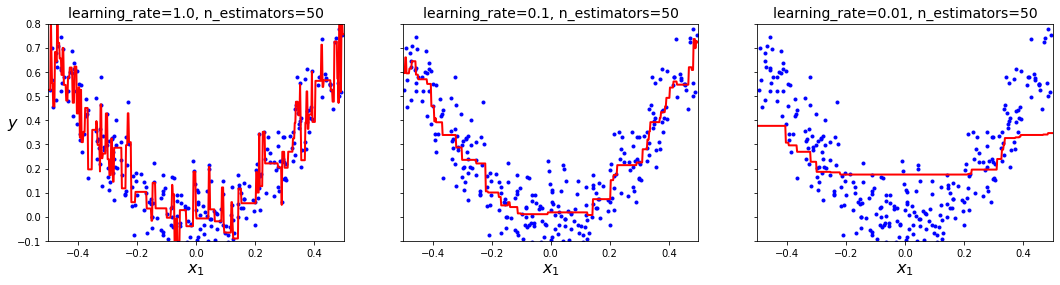

In [14]:
fix, axes = plt.subplots(ncols=3, figsize=(18,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.sca(axes[2])
plot_predictions([gbrt_slow2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow2.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

## Influence de `n_estimators`

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=80, learning_rate=0.1, random_state=42)
gbrt2.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
gbrt3 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt3.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

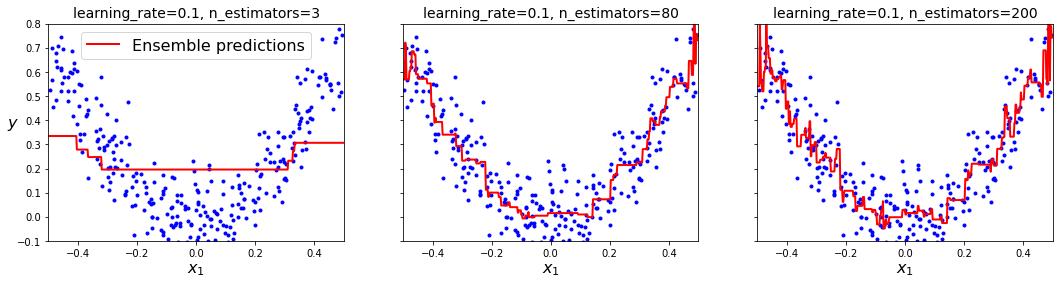

In [18]:
fix, axes = plt.subplots(ncols=3, figsize=(18,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt2.learning_rate, gbrt2.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.sca(axes[2])
plot_predictions([gbrt3], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt3.learning_rate, gbrt3.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

# Gradient boosting classification

**Question** construire un modèle de gradient boosting pour la base `breast_cancer`.

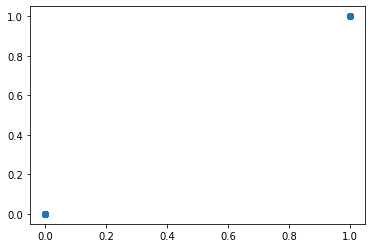

In [40]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

gbrt4 = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt4.fit(cancer["data"], cancer["target"])

gbrt4.predict(cancer["data"])

plt.scatter(gbrt4.predict(cancer["data"]),cancer["target"])

**Question** afficher l'importance des variables

In [41]:
importance=gbrt4.feature_importances_
importance

array([1.37304794e-03, 1.13501906e-02, 5.24105213e-04, 1.61312698e-03,
       0.00000000e+00, 1.20072876e-03, 6.20927172e-03, 1.30991255e-01,
       1.30372741e-04, 5.70768210e-05, 4.95550547e-03, 1.08420637e-03,
       5.12416566e-04, 1.82089915e-02, 8.99476638e-04, 1.86249854e-03,
       2.10005947e-03, 8.20407030e-04, 3.45960324e-05, 1.55610297e-03,
       2.56331019e-01, 2.80313974e-02, 2.06582173e-01, 9.86266969e-02,
       7.12052420e-03, 1.91881699e-03, 1.86728731e-02, 1.96155376e-01,
       1.07768757e-03, 0.00000000e+00])

**Question** comparer l'importance des variables obtenue avec gradient boosting avec celle obtenue avec random forest.

In [42]:
#Les variables ont une plus grande importance dans le modèle de gradient boosting

# Gradient boosting régression

**Question** construire un modèle de gradient boosting pour prédire le prix immobilier.

In [44]:
import pandas as pd
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")
housing = housing.replace(to_replace='yes', value=1, regex=True)
housing = housing.replace(to_replace='no', value=0, regex=True)

from sklearn.model_selection import train_test_split

X = housing[['lotsize','bedrooms','stories','bathrms','bathrms','driveway','recroom',
        'fullbase','gashw','airco','garagepl','prefarea']]

y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


gbrt5 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt5.fit(X_train, y_train)

gbrt5.predict(X_train)

array([ 494032.8625343 ,  915031.00446674,  518294.27797828,
        448139.80661084,  687286.72001841,  425621.23742448,
        410322.78911397,  376269.81453617,  639576.28376875,
        495850.10356519,  549420.69817099,  463915.30228986,
        581130.73113181,  581858.41588571,  570585.10925681,
        562709.3239942 ,  685683.05738507,  910274.20597041,
        495850.10356519,  391976.27171998,  934006.63708654,
        527341.09318607,  592597.6351661 ,  529806.10462488,
        932411.03661432,  462812.83318471,  445822.514884  ,
        608874.84250668, 1248772.49611689, 1023817.29634122,
        751045.81558007,  492862.6517073 ,  460817.44539614,
        988367.47781892,  410322.78911397,  343425.76701887,
        617564.31973947,  625202.98988426,  790913.24435877,
        381620.50472536,  795678.81903827,  810642.55811928,
        501938.10695586,  816017.19702948,  672240.33083537,
        629133.29586783,  513327.63582103,  725388.13658632,
        534193.43679137,

**Question** Comparer avec les résultats avec les autres algorithmes.

In [45]:
#Les résultats obtenus semblent avoir amélioré la performance, les montants sont plus cohérents

**Question** afficher l'importance des variables

In [46]:
importance=gbrt5.feature_importances_
importance

array([0.51211234, 0.0270458 , 0.05873995, 0.08773759, 0.06127412,
       0.01494463, 0.00722015, 0.02934456, 0.00500795, 0.10445482,
       0.05980899, 0.03230911])

**Question** comparer l'importance des variables obtenue avec gradient boosting avec celle obtenue avec random forest.

In [47]:
# Les valeurs obtenues sont plus petites que pour le random forest